### 500x500 matrix

|   block size |   linear time, s |   parallel inner loop time, s |   parallel outer loop time, s |
|--------------|------------------|-------------------------------|-------------------------------|
|            1 |            0.12  |                         0.924 |                         0.036 |
|            2 |            0.206 |                         0.258 |                         0.063 |
|            5 |            0.143 |                         0.202 |                         0.07  |
|           10 |            0.118 |                         0.294 |                         0.043 |
|           25 |            0.113 |                         0.103 |                         0.033 |
|           50 |            0.106 |                         0.057 |                         0.041 |
|          100 |            0.112 |                         0.058 |                         0.05  |

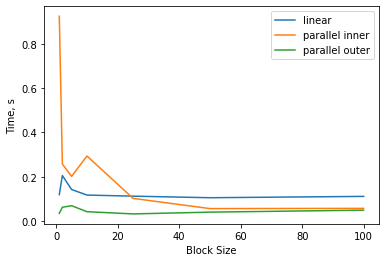

### 2100x2100 matrix

|   block size |   linear time, s |   parallel inner loop time, s |   parallel outer loop time, s |
|--------------|------------------|-------------------------------|-------------------------------|
|            1 |            42.8  |                         15.5  |                         14.1  |
|            2 |            22.8  |                         10.1  |                          8.69 |
|            5 |            11.4  |                          4.94 |                          4.55 |
|           10 |             8.85 |                          3.87 |                          3.57 |
|           25 |             8.07 |                          3.4  |                          3.34 |
|           50 |             9.28 |                          3.44 |                          3.42 |
|          100 |             8.97 |                          3.56 |                          3.56 |

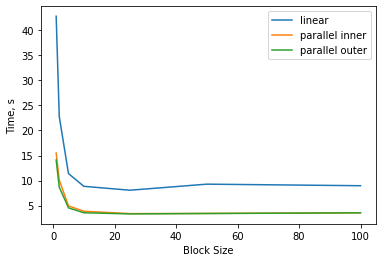

In [1]:
from tabulate import tabulate
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np

headers = ['block size', 'linear time, s', 'parallel inner loop time, s', 'parallel outer loop time, s']

with open('output.txt', 'r') as file:
    matrix_num, blocks_num = list(map(int, file.readline().split()))
    for _ in range(matrix_num):
        size = int(file.readline())
        display(Markdown(f'### {size}x{size} matrix'))

        table = [file.readline().split() for _ in range(blocks_num)]
        display(Markdown(tabulate(table, headers, tablefmt='github')))

        data = np.array(table)
        labels = ['linear', 'parallel inner', 'parallel outer']
        block_sizes = list(map(int, data[:,0]))
        plt.xlabel('Block Size')
        plt.ylabel('Time, s')
        plots = []
        for i in range(3):
            plot = plt.plot(block_sizes, list(map(float, data[:,i+1])), label=labels[i])[0]
            plots.append(plot)
        plt.legend(handles=plots)
        plt.show()

### extra analise for 2100x2100

|   block size |   linear time, s |   parallel inner loop time, s |   parallel outer loop time, s |
|--------------|------------------|-------------------------------|-------------------------------|
|           15 |             8.78 |                          3.7  |                          3.57 |
|           20 |             8.7  |                          3.6  |                          3.52 |
|           25 |             9.09 |                          3.47 |                          3.4  |
|           30 |             8.9  |                          3.54 |                          3.38 |
|           35 |             8.87 |                          3.38 |                          3.56 |

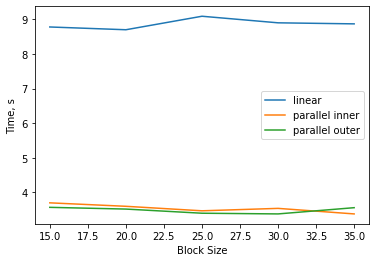

In [2]:
with open('extra_analise_output.txt', 'r') as file:
    matrix_num, blocks_num = list(map(int, file.readline().split()))
    for _ in range(matrix_num):
        size = int(file.readline())
        display(Markdown(f'### extra analise for {size}x{size}'))

        table = [file.readline().split() for _ in range(blocks_num)]
        display(Markdown(tabulate(table, headers, tablefmt='github')))

        data = np.array(table)
        labels = ['linear', 'parallel inner', 'parallel outer']
        block_sizes = list(map(int, data[:,0]))
        plt.xlabel('Block Size')
        plt.ylabel('Time, s')
        plots = []
        for i in range(3):
            plot = plt.plot(block_sizes, list(map(float, data[:,i+1])), label=labels[i])[0]
            plots.append(plot)
        plt.legend(handles=plots)
        plt.show()